https://towardsdatascience.com/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
airpassengers = pd.read_csv('./datasets/AirPassengers.csv')

airpassengers_ts = pd.Series(airpassengers['#Passengers'].values, 
                            index = pd.date_range('1949-01', periods = len(airpassengers), freq='M'))

perform log transformation to reduce the variance

In [136]:
airpassengers_log = np.log(airpassengers_ts)

Text(0.5, 1.0, 'log transformation')

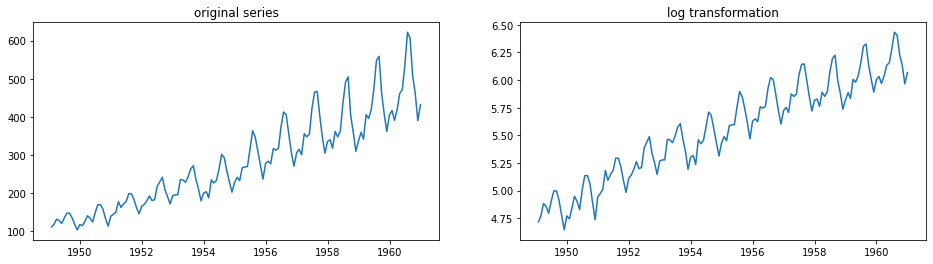

In [137]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 4))

ax1.plot(airpassengers_ts)
ax1.set_title('original series')

ax2.plot(airpassengers_log)
ax2.set_title('log transformation')

differencing

In [138]:
airpassengers_diff = airpassengers_log.diff()

Text(0.5, 1.0, 'differencing')

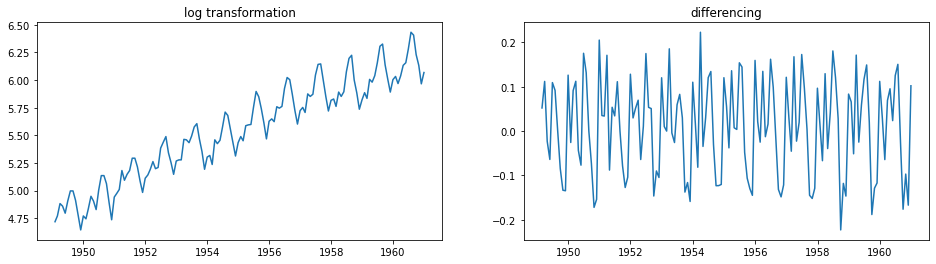

In [139]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 4))

ax1.plot(airpassengers_log)
ax1.set_title('log transformation')

ax2.plot(airpassengers_diff)
ax2.set_title('differencing')

### Stationarity Check

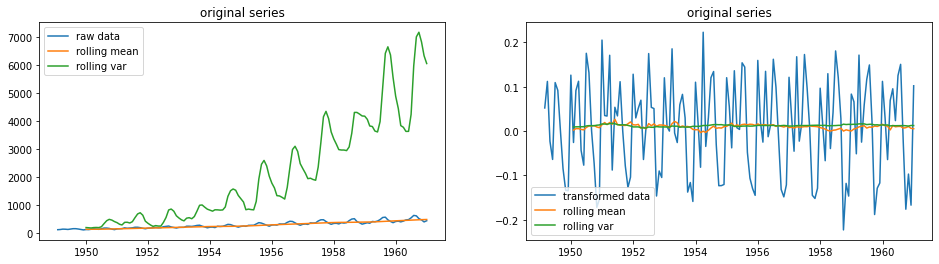

In [150]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 4))

ax1.plot(airpassengers_ts, label = 'raw data')
ax1.plot(airpassengers_ts.rolling(window=12).mean(), label="rolling mean");
ax1.plot(airpassengers_ts.rolling(window=12).var(), label="rolling var");
ax1.set_title('original series')
ax1.legend()

ax2.plot(airpassengers_diff, label = 'transformed data')
ax2.plot(airpassengers_diff.rolling(window=12).mean(), label="rolling mean");
ax2.plot(airpassengers_diff.rolling(window=12).var(), label="rolling var");
ax2.set_title('original series')
ax2.legend()

#### Augmented Dickey-Fuller Test

https://machinelearningmastery.com/time-series-data-stationary-python/

http://www.insightsbot.com/augmented-dickey-fuller-test-in-python/

In [155]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(airpassengers_ts)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
result = adfuller(airpassengers_diff[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
ADF Statistic: -2.717131
p-value: 0.071121
Critical Values:
	1%: -3.483
	5%: -2.884
	10%: -2.579


### Simple Forecasting

In [105]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

ses = SimpleExpSmoothing(airpassengers_diff[1:])
ses = model.fit()

ses_forecast = ses.forecast(24)

Text(0.5, 1.0, 'forecast for next 24 month')

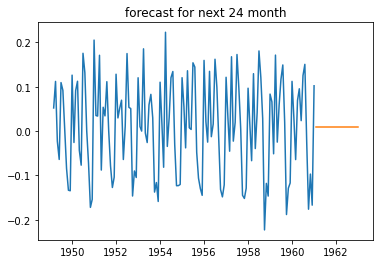

In [111]:
plt.plot(airpassengers_diff)
plt.plot(ses_forecast)
plt.title('forecast for next 24 month')

inverse differencing

In [95]:
ses_forecast[0] = airpassengers_log[-1]
ses_forecast_inv_diff = ses_forecast.cumsum()

inverse log transformation

In [ ]:
ses_forecast_inv_log = np.exp(ses_forecast_inv_diff)

Text(0.5, 1.0, 'inverse log transformation')

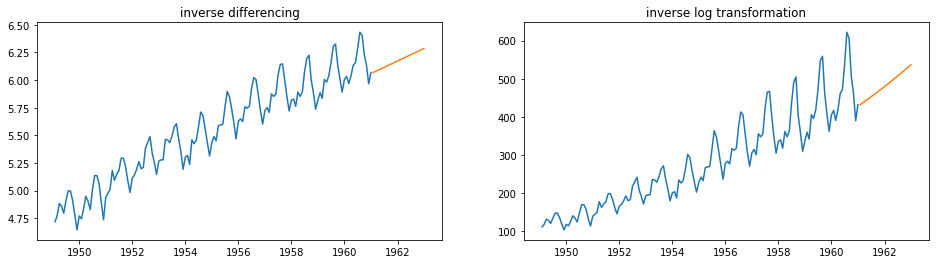

In [108]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 4))

ax1.plot(airpassengers_log)
ax1.plot(ses_forecast_inv_diff)
ax1.set_title('inverse differencing')


ax2.plot(airpassengers_ts)
ax2.plot(ses_forecast_inv_log)
ax2.set_title('inverse log transformation')

In [115]:
airpassengers_log

1949-01-31    4.718499
1949-02-28    4.770685
1949-03-31    4.882802
1949-04-30    4.859812
1949-05-31    4.795791
                ...   
1960-08-31    6.406880
1960-09-30    6.230481
1960-10-31    6.133398
1960-11-30    5.966147
1960-12-31    6.068426
Freq: M, Length: 144, dtype: float64

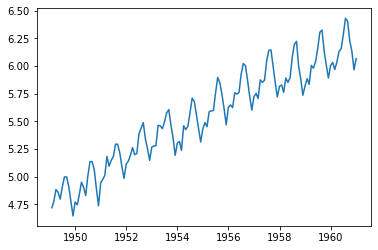

In [116]:
plt.plot(airpassengers_log)

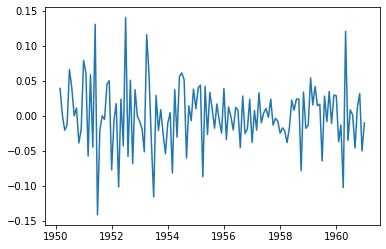

In [120]:
plt.plot(airpassengers_log.diff(periods=12).diff(periods=1))

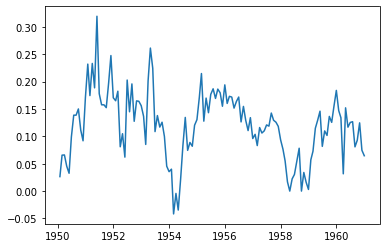

In [121]:
plt.plot(airpassengers_log.diff(periods=12))